# Exercises 06


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import scipy

## Matplotlib exercises

### `subplots` exercise

Plot the sine and cosine for angles between 0 and 360 degrees using `subplots`.

Hint: For `axes` instead of using `plt.xlabel` to set the $x$ label of your axe, you need to use the function `ax.set_xlabel`

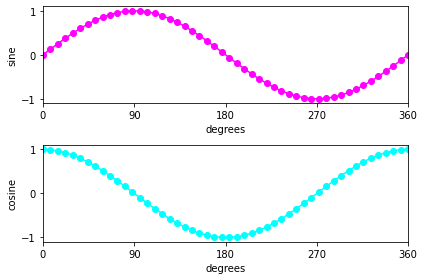

In [4]:

degrees = np.linspace(0, 360, 50)

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(degrees, np.sin(np.radians(degrees)), "o-", color="magenta", label="sin")
ax1.set_xlabel("degrees")
ax1.set_ylabel("sine")
ax1.set_xticks(range(0,360+90, 90))
ax1.set_xlim(0,360)

ax2.plot(degrees, np.cos(np.radians(degrees)), "o-", color="cyan", label="cos")
ax2.set_xlabel("degrees")
ax2.set_ylabel("cosine")
ax2.set_xticks(range(0,360+90, 90))
ax2.set_xlim(0,360)

plt.tight_layout()
plt.savefig("subplots.png")
plt.show()

The result should look like this one
<img src="subplots.png" alt="Drawing" style="width: 600px;"/>

## `twin` exercise

Plot the sine and cosine function, but this time using different Y-axis.


Hint: For more information about `twinx` https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py

In [3]:
import numpy as np
import matplotlib.pyplot as plt


degrees = np.linspace(0, 360, 50)

fig, ax1 = plt.subplots()

ax1.set_xlabel('degrees')
ax1.set_ylabel('sine', color="magenta")
ax1.plot(degrees, np.sin(np.radians(degrees)), "o-", color="magenta", label="sin")
ax1.set_xticks(range(0,360+90, 90))
ax1.set_xlim(0,360)
ax1.tick_params(axis='y', labelcolor="magenta")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('cosine', color="cyan")  # we already handled the x-label with ax1
ax2.plot(degrees, np.cos(np.radians(degrees)), "o-", color="cyan", label="cos")
#ax2.set_xlabel("degrees")
#ax2.set_ylabel("cosine")
ax2.set_xticks(range(0,360+90, 90))
ax2.set_xlim(0,360)
ax2.tick_params(axis='y', labelcolor="cyan")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("twin.png")
plt.show()

The result should look like this one
<img src="twin.png" alt="Drawing" style="width: 600px;"/>

## Numpy exercises



### Numerical integration

You need to determine the area under a curve.

Text(0, 0.5, 'measured intensity / absorption')

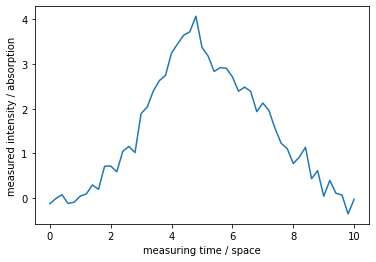

In [5]:
# Data
x_y_data = np.loadtxt('measured_data.txt')
x, y = x_y_data[0], x_y_data[1]
plt.plot(x, y)
plt.xlabel('measuring time / space')
plt.ylabel('measured intensity / absorption')

### Use Python to integrate

Numerically calculate integral using trapezoidal rule and lists (return float)
 
Hint: see https://en.wikipedia.org/wiki/Trapezoidal_rule

In [6]:
def integrate_trap(x,y):
    """numerically calculate integral using trapezoidal rule and lists (return float)
    see https://en.wikipedia.org/wiki/Trapezoidal_rule"""
    ### BEGIN SOLUTION
    if len(x) == len(y):
        s = 0
        for i in range(len(x)-1):
            dx = x[i+1] - x[i]
            y_mean = (y[i] + y[i+1]) / 2.0
            s+= dx * y_mean
        return s
    ### END SOLUTION

In [7]:
integrate_trap(x,y)
# 14.93075433025658

14.93075433025658

In [8]:
assert round(integrate_trap(x,y), 5) == 14.93075
### BEGIN HIDDEN TESTS
import scipy.integrate
for i in range(1,10):
    assert abs(integrate_trap(x[i:-i],y[i:-i]) - scipy.integrate.trapz(y[i:-i],x[i:-i])) < 10**-10
### END HIDDEN TESTS

## Use Numpy arrays to integrate

Hint: To calculate the difference between points $\Delta x$. You need to calculate:
```python
dx = x_y_data[0,1:] - x_y_data[0,:-1]
```
Use a similar process to calculate the mean of consecutive values. Then use dot product of your arrays.

In [9]:
import numpy as np
def integrate_trap_np(x_y_data):
    """numerically calculate integral using trapezoidal rule and numpy (indexing and np.dot)"""
    ### BEGIN SOLUTION
    dx = x_y_data[0,1:] - x_y_data[0,:-1]
    y_mean = (x_y_data[1,1:] + x_y_data[1,:-1]) / 2
    return np.dot(dx, y_mean)
    ### END SOLUTION

In [10]:
integrate_trap_np(x_y_data)
# 14.93075433025658

14.93075433025658

In [11]:
assert round(integrate_trap_np(x_y_data), 5) == 14.93075
### BEGIN HIDDEN TESTS
x,y = x_y_data
import scipy
for i in range(1,10):
    assert abs(integrate_trap_np(x_y_data[:,i:-i]) - scipy.integrate.trapz(y[i:-i],x[i:-i])) < 10**-10
### END HIDDEN TESTS

## Use Numpy arrays to integrate using the Simpson's rule

Hint: Use the previous implementation to calculate the Integrate using the Simpson's rule.<br/> Remember, the integral is like: 

$$\mathrm{Integral_{simpson} = (4 \cdot Integral_{trapz}(complete\ data) - Integral_{trapz}(half\ of\ the\ data;\ i.e.\ every\ second\ point)) / 3}$$

In [11]:
import numpy as np
def integrate_sim_np(x_y_data):
    """numerically calculate integral using simpson's rule and numpy (indexing and integrate_trap_np function)
    Is = (4It(complete data) - It(half of the data; i.e. every second point)) / 3
    Is integral using Simpson's rule and It using trapezoidal rule
    see https://en.wikipedia.org/wiki/Simpson%27s_rule"""
    ### BEGIN SOLUTION
    return (4 * integrate_trap_np(x_y_data) - integrate_trap_np(x_y_data[:,::2]))/3
    ### END SOLUTION

In [12]:
# Check your results:
integrate_sim_np(x_y_data) # 14.843016211633548

14.843016211633548

## Leslie Matrix

In applied mathematics, the Leslie matrix is a discrete, age-structured model of population growth that is very popular in population ecology.





Suppose that you are studying a species with a maximum lifespan of 4 years.  The following is an age-based Leslie matrix for this species.  Each row in the first and third matrices corresponds to animals within a given age range (0–1 years, 1–2 years and 2–3 years).  In a Leslie matrix the top row of the middle matrix consists of age-specific fertilities: F<sub>1</sub>, F<sub>2</sub> and F<sub>3</sub>.  S<sub>1</sub>, S<sub>2</sub> are the survival of species with age N<sub>1</sub> and N<sub>2</sub>, respectively. Since this species does not live to be 4 years old the matrix does not contain an S<sub>3</sub> term.

<math>
\begin{align}
\begin{pmatrix}
N_{t+1,1} \\
N_{t+1,2} \\
N_{t+1,3}
\end{pmatrix} &=
\begin{pmatrix}
F_1 & F_2 & F_3 \\
S_1 & 0 & 0 \\
0 & S_2 & 0
\end{pmatrix}
\begin{pmatrix}
N_{t,1}\\
N_{t,2}\\
N_{t,3}
\end{pmatrix}
\end{align} .
</math>

[https://en.wikipedia.org/wiki/Leslie_matrix

Considering a `L` Leslie matrix:

In [13]:
import numpy as np
L = np.array([[0.4, 0.8, 0.1], [0.5, 0, 0], [0, 0.9, 0]])
L

array([[0.4, 0.8, 0.1],
       [0.5, 0. , 0. ],
       [0. , 0.9, 0. ]])

In [14]:
def get_fertilities(L):
    """ Get the top row of the Leslie matrix
    return 1D np.array"""
    
    ### BEGIN SOLUTION
    return L[0,:]
    ### END SOLUTION

Check your results:

In [15]:
L = np.array([[0.4, 0.8, 0.1], [0.5, 0, 0], [0, 0.9, 0]])
get_fertilities(L)
# result: array([0.4, 0.8, 0.1])

array([0.4, 0.8, 0.1])

In [16]:
np.testing.assert_array_equal(get_fertilities(L), np.array([0.4, 0.8, 0.1 ]))
### BEGIN HIDDEN TESTS
for i in range(3):
    temp = np.random.rand(5,5)
    np.testing.assert_array_equal(get_fertilities(temp), temp[0,:])
### END HIDDEN TESTS


In [17]:
def get_survival_rate_2(L):
    """ Get the S2 term of the Leslie matrix 
    return float"""
    
    ### BEGIN SOLUTION
    return L[2,1]
    ### END SOLUTION

Check your results:

In [18]:
L = np.array([[0.4, 0.8, 0.1], [0.5, 0, 0], [0, 0.9, 0]])
get_survival_rate_2(L)
# result 0.9

0.9

In [19]:
assert get_survival_rate_2(L) == 0.9
### BEGIN HIDDEN TESTS
for i in range(3):
    temp = np.random.rand(5,5)
    assert get_survival_rate_2(temp) == temp[2,1]
### END HIDDEN TESTS


With an initial population (e.g., 100 animals per stage) and a Leslie matrix, calculate the fate of the population after a given number of generations (iterations). Get a numpy array containing the population per stages (age) per iteration (generation). 

In [20]:
def get_population_per_time(L, N0, N_iterations=10):
    """
    input L Leslie matrix; shape = (n_stages x n_stages)
    N0 - initial population; shape = n
    N_iterations - integer
    return numpy array of a shape = (N_iterations + 1 x n_stages)
    """
    ### BEGIN SOLUTION
    # option1
    #population = np.array(N)
    #population = population.reshape(1,3)
    
    # option2
    population = N0[np.newaxis, :]
    
    # option3
    population = N0
    for i in range(N_iterations):
        N0 = np.matmul(L, N0)
        population = np.vstack([population, N0])

    return population
    ### END SOLUTION
    


Check your results:

In [21]:
N0 = np.ones(3) * 100
population_per_time = get_population_per_time(L, N0, N_iterations=10)
print(population_per_time[:3])
print(population_per_time[-3:])
print(population_per_time.shape)

[[100. 100. 100.]
 [130.  50.  90.]
 [101.  65.  45.]]
[[56.179861   31.232145   31.179645  ]
 [50.5756249  28.0899305  28.1089305 ]
 [45.51308741 25.28781245 25.28093745]]
(11, 3)


In [22]:
solution_population =  np.array([[100.        , 100.        , 100.        ],
       [130.        ,  50.        ,  90.        ],
       [101.        ,  65.        ,  45.        ],
       [ 96.9       ,  50.5       ,  58.5       ],
       [ 85.01      ,  48.45      ,  45.45      ],
       [ 77.309     ,  42.505     ,  43.605     ],
       [ 69.2881    ,  38.6545    ,  38.2545    ],
       [ 62.46429   ,  34.64405   ,  34.78905   ],
       [ 56.179861  ,  31.232145  ,  31.179645  ],
       [ 50.5756249 ,  28.0899305 ,  28.1089305 ],
       [ 45.51308741,  25.28781245,  25.28093745]])
np.testing.assert_almost_equal(get_population_per_time(L, np.array([100,100,100]), N_iterations=10), solution_population)
### BEGIN HIDDEN TESTS
def solution_fnc_get_population_per_time(L, N0, N_iterations=10):
    population = N0
    for i in range(N_iterations):
        N0 = np.matmul(L, N0)
        population = np.vstack([population, N0])
    return population

for i in np.arange(20, 50, 10):
    N0 = np.ones(3) * i
    np.testing.assert_almost_equal(get_population_per_time(L, N0, 5), solution_fnc_get_population_per_time(L, N0, 5))
### END HIDDEN TESTS


From the previous return `population_per_time` get an array containing the total population per time.

In [23]:
def get_total_population_per_time(population_per_time):
    """calculate the total population in each generation
    input population_per_time - result from above function (shape = (N_iterations + 1 x n_stages))
    return np.array of shape N_iterations + 1"""
    ### BEGIN SOLUTION
    return np.sum(population_per_time, axis=1)
    ### END SOLUTION

Check your results:

In [24]:
solution_population_per_time =  np.array(
      [[100.        , 100.        , 100.        ],
       [130.        ,  50.        ,  90.        ],
       [101.        ,  65.        ,  45.        ],
       [ 96.9       ,  50.5       ,  58.5       ],
       [ 85.01      ,  48.45      ,  45.45      ],
       [ 77.309     ,  42.505     ,  43.605     ],
       [ 69.2881    ,  38.6545    ,  38.2545    ],
       [ 62.46429   ,  34.64405   ,  34.78905   ],
       [ 56.179861  ,  31.232145  ,  31.179645  ],
       [ 50.5756249 ,  28.0899305 ,  28.1089305 ],
       [ 45.51308741,  25.28781245,  25.28093745]])
get_total_population_per_time(solution_population_per_time)
# result 
# array([300.        , 270.        , 211.        , 205.9       ,
#      178.91      , 163.419     , 146.1971    , 131.89739   ,
#      118.591651  , 106.7744859 ,  96.08183731])

array([300.        , 270.        , 211.        , 205.9       ,
       178.91      , 163.419     , 146.1971    , 131.89739   ,
       118.591651  , 106.7744859 ,  96.08183731])

In [25]:
np.testing.assert_almost_equal(get_total_population_per_time(population_per_time), np.array([300.        , 270.        , 211.        , 205.9       ,
       178.91      , 163.419     , 146.1971    , 131.89739   ,
       118.591651  , 106.7744859 ,  96.08183731]))

### BEGIN HIDDEN TESTS
def solution_fnc_get_population_per_time(L, N0, N_iterations=10):
    population = N0
    for i in range(N_iterations):
        N0 = np.matmul(L, N0)
        population = np.vstack([population, N0])
    return population

def solution_get_total_population_per_time(population_per_time):
    return np.sum(population_per_time, axis=1)
    
for i in np.arange(20, 50, 10):
    N0 = np.ones(3) * i
    temp_pop = solution_fnc_get_population_per_time(L, N0, 5)
    np.testing.assert_almost_equal(get_total_population_per_time(temp_pop), solution_get_total_population_per_time(temp_pop))
### END HIDDEN TESTS
